<a href="https://colab.research.google.com/github/DiegoF-G/Numpy/blob/main/numpy3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Selecionando dados

In [36]:
import numpy as np
# diametro, peso e cores de laranjas e toranjas
url = 'https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv'
dados = np.loadtxt(url, delimiter=',', usecols=np.arange(1,6,1), skiprows=1)

"""Selecionando diametro (coluna 0) e peso (coluna 1) das laranjas e toranjas,
   da linha 0 a 4999 são laranjas e o restante é das toranjas"""
diameter_orange, weight_orange = dados[:5000, 0], dados[:5000, 1]
diameter_grapefruit, weight_grapefruit = dados[5000:, 0], dados[5000:, 1]
print(f'{diameter_orange}\n{diameter_grapefruit}\n{weight_orange}\n{weight_grapefruit}')


[ 2.96  3.91  4.42 ... 12.55 12.75 12.87]
[ 7.63  7.69  7.72 ... 15.59 15.92 16.45]
[ 86.76  88.05  95.17 ... 218.07 230.13 231.09]
[126.79 133.98 135.56 ... 256.5  260.14 261.51]


# Regressão Linear

**Vamos obter as retas que mais se aproximam dos valores dos arrays de pesos das laranjas e toranjas, por Regressão Linear.**

A fórmula para obtenção dos coeficientes da equação dessa reta é obtida por cálculo diferencial (otimização com derivadas parciais, além de outros meios), aqui só estou preocupado em usar a fórmula :)

Poderia também usar o pacote "Sklearn" que já traz o modelo de regressão linear pronto pra uso, porém, a fim de querer treinar operações com os arrays do Numpy farei isso manualmente.

Segue artido da Alura sobre Regressão Linear, incluindo as fórmulas.

[Regressão Linear](https://www.alura.com.br/artigos/desvendando-a-regressao-linear)

In [37]:
# Variáveis e coeficientes das laranjas
Xo = diameter_orange
Yo = weight_orange
n_orange = np.size(Yo)

a_orange = (n_orange*np.sum(Xo*Yo) - np.sum(Xo)*np.sum(Yo))/(n_orange*np.sum(Xo**2)-np.sum(Xo)**2)
b_orange = np.mean(Yo) - a_orange*np.mean(Xo)

# Variáveis e coeficientes das toranjas
Xg = diameter_grapefruit
Yg = weight_grapefruit
n_grapefruit = np.size(Yg)

a_grapefruit = (n_grapefruit*np.sum(Xg*Yg) - np.sum(Xg)*np.sum(Yg))/(n_grapefruit*np.sum(Xg**2)-np.sum(Xg)**2)
b_grapefruit = np.mean(Yg) - a_grapefruit*np.mean(Xg)

In [38]:
def plot_lr(diametros, pesos, nome, angular_coef, linear_coef):
  import matplotlib.pyplot as plt
  plt.plot(diametros, pesos)
  plt.plot(diametros, angular_coef*diametros + linear_coef)
  plt.title('Weight by Diameter')
  plt.xlabel('Diameter')
  plt.ylabel('Weight')
  plt.legend([f'{nome}', f'LR {nome}'])

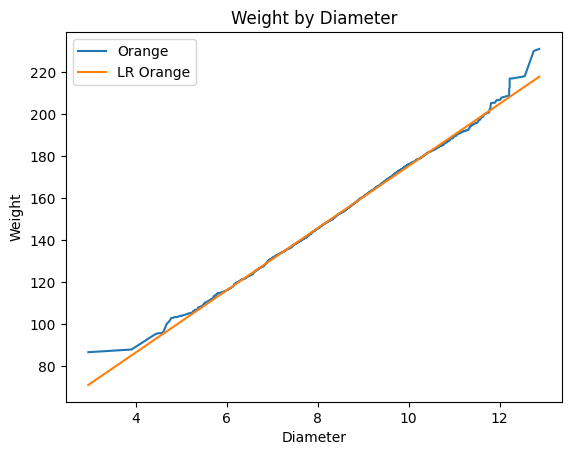

In [39]:
# Plotando reta da LR (Linear Regression) das laranjas
plot_lr(diameter_orange, weight_orange, 'Orange', a_orange, b_orange)

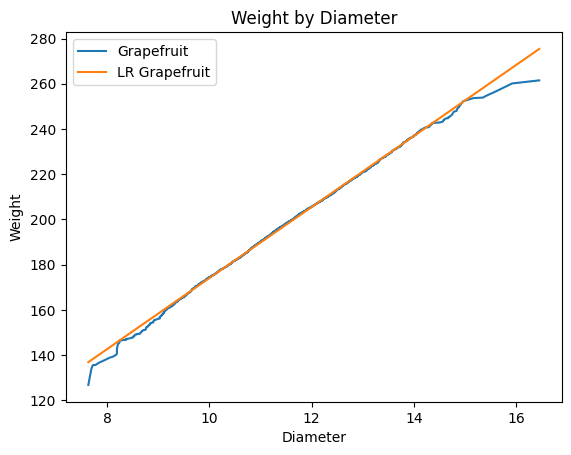

In [40]:
# Plotando reta da LR (Linear Regression) das toranjas
plot_lr(diameter_grapefruit, weight_grapefruit, 'Grapefruit', a_grapefruit, b_grapefruit)